# Times Series analysis and prediction using Python

The aim of this little notebook is to give some tools that can be used to make some predictions on time series in its simplest version. If we assume that we have access to the values of the time series $(Y_t)_{t=1}^T$ and that we aim to predict the next values.

We are going to use several approaches and see howe they can be implemented in order to see how to use them in Python and compare their performances.


## Statisical models

We are first going to work with a dataset that that is directly in Python and use some statistical models for prediction, the one presented in class.

For this first part, we are going to work with BTC Times series data, in order to predict the future price of the Bitcoin.


In [79]:
import pandas_datareader.data as web
import datetime
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import datetime
from datetime import datetime
import yfinance as yf


In [42]:
btc = yf.download(['BTC-USD'], start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))['Close']
print(btc.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Ticker           BTC-USD
Date                    
2018-01-01  13657.200195
2018-01-02  14982.099609
2018-01-03  15201.000000
2018-01-04  15599.200195
2018-01-05  17429.500000


In [44]:
btc.index = pd.to_datetime(btc.index)


We now represent the data

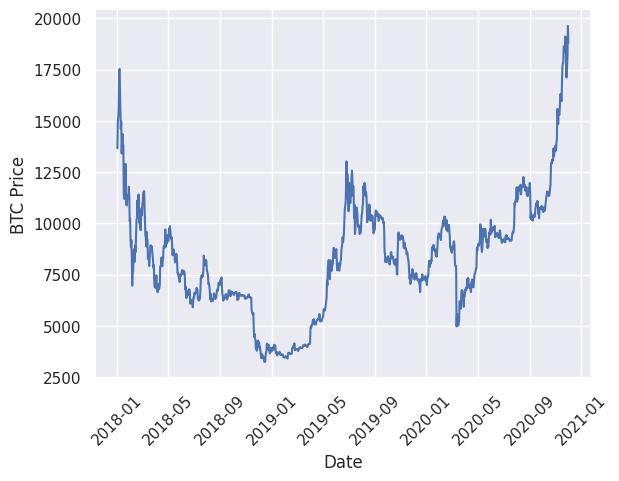

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['BTC-USD'], )

We are going to split the data into training and testing set.

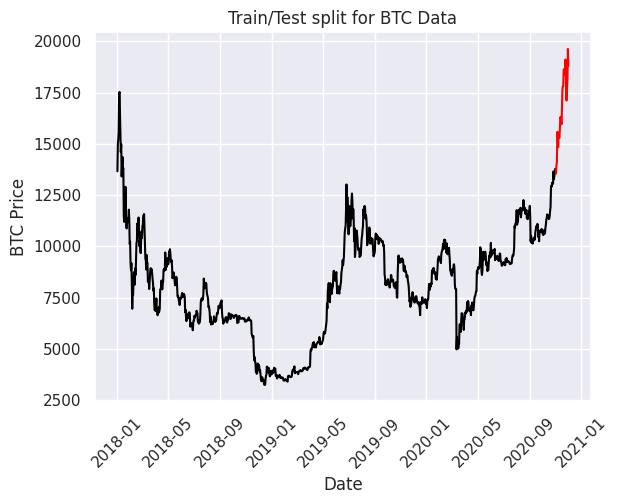

In [48]:
train = btc[btc.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = btc[btc.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

### About SARIMAX function in Python used for autoregressive approaches

The Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors (SARIMAX) model is a powerful time series forecasting technique that extends the traditional ARIMA model to account for seasonality and external factors. It's a versatile model that can accommodate both autoregressive (AR) and moving average (MA) components, integrate differencing to make the data stationary, and incorporate external variables or regressors. SARIMAX is particularly valuable when dealing with time-dependent data that exhibits recurring patterns over specific time intervals.

* Seasonal Component (S): Captures the periodic patterns in the data, such as weekly, monthly, or yearly cycles.
* Autoregressive Component (AR): Represents the relationship between the current value and previous values in the time series.
* Integrated Component (I): Involves differencing to make the time series stationary by removing trends and seasonality.
* Moving Average Component (MA): Accounts for the dependency of the current value on past error terms, used to calculate trend.
* Exogenous Regressors (X): Allows the inclusion of external variables that may affect the time series

### Autoregressive Moving Average (ARMA) Models

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


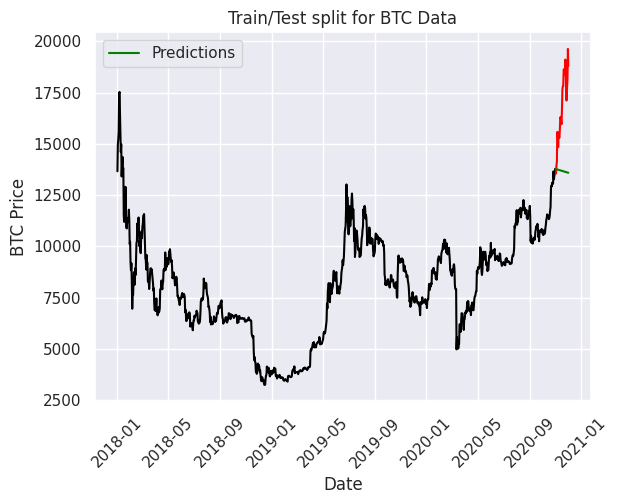

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the input

y = train['BTC-USD']

# Define the statical model and fit it
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

# Predictions

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

# Graphs

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

We can also predict the errors made by the model.

In [51]:
arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  3562.1356482324695


### Autoregressive Integrated Moving Average (ARMIA) Models


In [52]:
from statsmodels.tsa.arima.model import ARIMA

An ARIMA task has three parameters. The first parameter corresponds to the lagging (past values), the second corresponds to differencing (this is what makes non-stationary data stationary), and the last parameter corresponds to the white noise (for modeling shock events)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE:  758.2835609277059


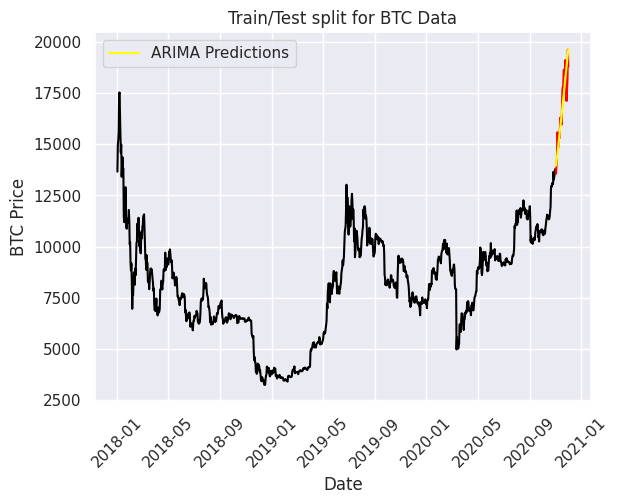

In [57]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

Play a little with the shifting parameter.

### Seasonal ARIMA (SARIMA)

Seasonal ARIMA captures historical values, shock events and seasonality. We can define a SARIMA model using the SARIMAX class.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


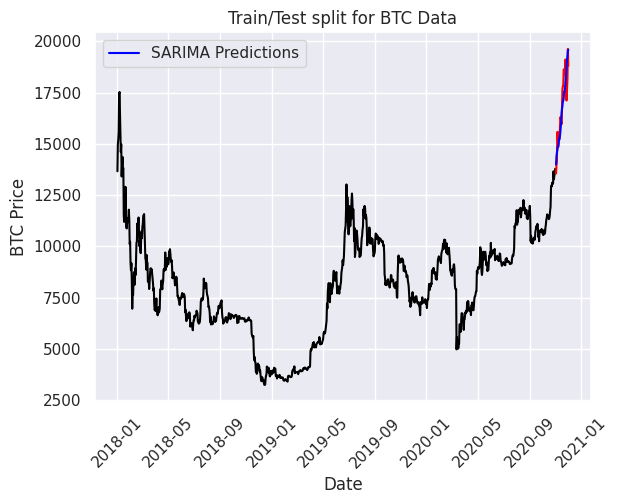

In [58]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

## Machine Learning Method

In [1]:
import pandas
import matplotlib.pyplot as plt

The dataset we are going to study the evolution of the number of air passengers (1k unit) from January 1949 to December 1960, 12 years of study, i.e., 144 observations.

In [82]:
df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

# We are just going to focus on the number of passengers

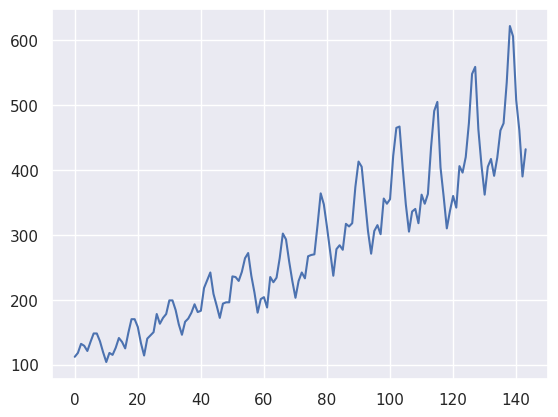

In [84]:
# We can have a graphical representation of the number of passengers
# for this simple dataset.

plt.plot(df['#Passengers'])
plt.show()

In [85]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


The code below is used such that the month can be used as index.

In [86]:
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
df = df.set_index(['Month'])

<ipython-input-86-b5259656d744>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)


In [88]:
df['#Passengers_diff'] = df['#Passengers'].diff(periods=12)
df.info()
df['#Passengers_diff'].fillna(method='backfill', inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #Passengers       144 non-null    int64  
 1   #Passengers_diff  132 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.4 KB


<ipython-input-88-a5dbcd1ddce6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['#Passengers_diff'].fillna(method='backfill', inplace=True)
<ipython-input-88-a5dbcd1ddce6>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['#Passengers_diff'].fillna(method='backfill', inplace=True)


Before starting with the predictions using this time series, we can try analyze its different components.

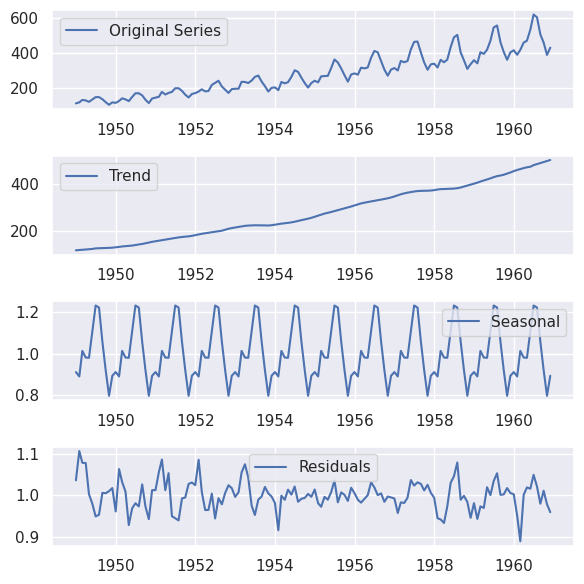

In [90]:
result = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12, extrapolate_trend='freq')
#The extrapolate_trend='freq' parameter is added to ensure that the trend component has the same frequency as the data,
# which can help to avoid issues with missing values when decomposing the series.
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(6,6))

plt.subplot(4, 1, 1)
plt.plot(df['#Passengers'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

## LSTM Netowrk

The Long Short-Term Memory network, or LSTM network, is a recurrent neural network trained using Backpropagation Through Time.
It is able to keep in memory what happened in the past for future predictions.

There are three types of gates within a unit:



* **Forget Gate**: conditionally decides what information to throw away from the block
* **Input Gate**: conditionally decides which values from the input to update the memory state
* **Output Gate**: conditionally decides what to output based on input and the memory of the block

Let us use it for the regression.
For this purpose, we are going to use *Tensorflow (similar to Pytorch), powerfull tool to perform studies with Neural Network models







In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

We are going to fix the seed for reproducibility. So that we are going to all have the same results.

In [ ]:
dataset = pandas.read_csv('datasets/passengers.csv', usecols=[1], engine='python')
dataset.head()

In [10]:
tf.random.set_seed(7)


We are going to load the dataset again.

In [9]:

dataframe = pd.read_csv('datasets/passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

As we have done in traditional Machine Learning, i.e., with the other models, we are going to normalize the data in order to avoid some issues that may raise with LSTM achitecture.

Then we seperate the data into training and testing

In [11]:
# Data Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


We are now going to modify the dataset a little in order to be used for a regression task.

Keep in mind that the idea is to used previous value in order to predict the current one.

In [21]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [22]:
trainX[:5]


array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]], dtype=float32)

In [23]:
trainY[:5]

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557],
      dtype=float32)

If you compare these first five rows to the original dataset sample listed in the previous section, you can see the $X_t$ and $Y_{t+1}$ pattern in the numbers.

It remains to reshape a little all of these things.

In [26]:
# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Now that the data are ready, we can create our fist LSTM model/architecture.

The network we are going to consider has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction.

The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs, and a batch size of 1 is used.

In [27]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
94/94 - 2s - 23ms/step - loss: 0.0298
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0132
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0106
Epoch 4/100
94/94 - 0s - 3ms/step - loss: 0.0095
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0085
Epoch 6/100
94/94 - 0s - 3ms/step - loss: 0.0075
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0066
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0057
Epoch 9/100
94/94 - 0s - 3ms/step - loss: 0.0049
Epoch 10/100
94/94 - 0s - 3ms/step - loss: 0.0042
Epoch 11/100
94/94 - 0s - 3ms/step - loss: 0.0037
Epoch 12/100
94/94 - 0s - 3ms/step - loss: 0.0032
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0029
Epoch 14/100
94/94 - 0s - 3ms/step - loss: 0.0026
Epoch 15/100
94/94 - 0s - 3ms/step - loss: 0.0024
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0023
Epoch 17/100
94/94 - 0s - 3ms/step - loss: 0.0022
Epoch 18/100
94/94 - 0s - 3ms/step - loss: 0.0021
Epoch 19/100
94/94 - 0s - 3ms/step - loss: 0.0021
Epoch 20/100
94/94 - 0s - 3ms/step - loss: 0.0021
Epoch 21

The model is learned and trained on the data, we can use it for predictions and study its performances

In [28]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Invert predictions : keep in mind that the data have been normalized so we
# need to come back to the initial values.
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Train Score: 22.78 RMSE
Test Score: 49.46 RMSE


We can now represent graphically the predictions and compare them to true values of the time series.

Because of how the dataset was prepared, you must shift the predictions so that they align on the x-axis with the original dataset. Once prepared, the data is plotted, showing the original dataset in blue, the predictions for the training dataset in orange, and the predictions on the unseen test dataset in green.

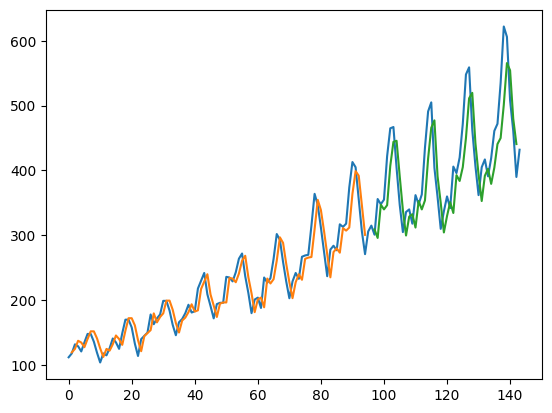

In [30]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

For the current prediction, we have only used the past value, but we can also to use several values in the past, why not the three previous ones!
In other words, we are going to change the window we use for the prediction.

For this purpose, we just need to change one parameter of the previous code which is the parameter look back and set to 3.

In [31]:
# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [32]:
# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [33]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 20ms/step - loss: 0.0630
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0343
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0244
Epoch 4/100
94/94 - 0s - 3ms/step - loss: 0.0213
Epoch 5/100
94/94 - 0s - 3ms/step - loss: 0.0200
Epoch 6/100
94/94 - 0s - 3ms/step - loss: 0.0190
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0182
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0173
Epoch 9/100
94/94 - 0s - 3ms/step - loss: 0.0165
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0157
Epoch 11/100
94/94 - 0s - 3ms/step - loss: 0.0149
Epoch 12/100
94/94 - 0s - 3ms/step - loss: 0.0140
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0132
Epoch 14/100
94/94 - 0s - 3ms/step - loss: 0.0123
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0114
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0105
Epoch 17/100
94/94 - 0s - 3ms/step - loss: 0.0096
Epoch 18/100
94/94 - 0s - 3ms/step - loss: 0.0087
Epoch 19/100
94/94 - 0s - 3ms/step - loss: 0.0078
Epoch 20/100
94/94 - 0s - 3ms/step - loss: 0.0069
Epoch 21/100
94/94 -

In [34]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Invert predictions : keep in mind that the data have been normalized so we
# need to come back to the initial values.
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Train Score: 22.65 RMSE
Test Score: 55.03 RMSE


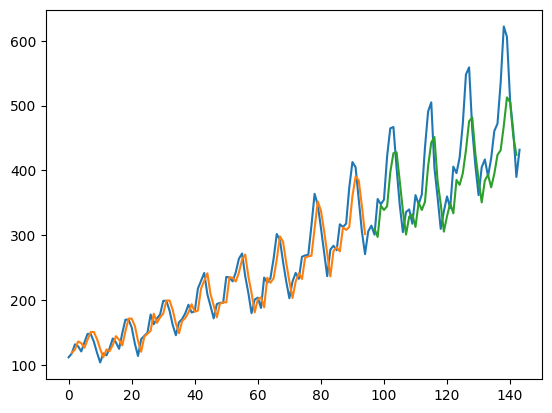

In [35]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

You can see that, in this situation, using a longer period in the past for the prediction is not meaningfull in terms of performances.